# E-COMMERCE RECOMMENDATION SYSTEM

### Environment Setup

#### Prerequisites
- Ensure you have Python installed (>= 3.7) 

#### Install Required Packages
- Run the following command:

    ```bash
    pip install pandas numpy matplotlib seaborn scikit-learn

    ```

### Dataset Setup

#### The Retailrocket Dataset

1. Download the dataset from: https://www.kaggle.com/datasets/retailrocket/ecommerce-dataset/data
2. Select the file `events.csv`
3. Create a `data` folder in the project root directory
4. Place the downloaded `events.csv` file in the `data` folder

### Load and Explore Data (EDA)

In [3]:


## Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Load the dataset
df = pd.read_csv("data/events.csv")

# Display basic info
df.info()
df.head()


## Check for missing values

print("Missing values per column:\n", df.isnull().sum())


## Basic statistics

print("Basic Statistics:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB
Missing values per column:
 timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64
Basic Statistics:
          timestamp     visitorid        itemid  transactionid
count  2.756101e+06  2.756101e+06  2.756101e+06   22457.000000
mean   1.436424e+12  7.019229e+05  2.349225e+05    8826.497796
std    3.366312e+09  4.056875e+05  1.341954e+05    5098.996290
min    1.430622e+12  0.000000e+00  3.000000e+00       0.000000
25%    1.433478e+12  3.505660e+05  1.181200e+05    4411.000000
50%    1.436453e+12  7.020600e+05  2.360670e+05    8813.000000
75%

In [2]:
print(df)

             timestamp  visitorid event  itemid  transactionid
0        1433221332117     257597  view  355908            NaN
1        1433224214164     992329  view  248676            NaN
2        1433221999827     111016  view  318965            NaN
3        1433221955914     483717  view  253185            NaN
4        1433221337106     951259  view  367447            NaN
...                ...        ...   ...     ...            ...
2756096  1438398785939     591435  view  261427            NaN
2756097  1438399813142     762376  view  115946            NaN
2756098  1438397820527    1251746  view   78144            NaN
2756099  1438398530703    1184451  view  283392            NaN
2756100  1438400163914     199536  view  152913            NaN

[2756101 rows x 5 columns]


## Hypothesis Testing with Chi-Square Test

### Hypothesis Definition

**Null Hypothesis (H0)**: There is no significant relationship between user interaction types (event) and transaction occurrence.

**Alternative Hypothesis (H1)**: There is a significant relationship between user interaction types and transaction occurrence.

### Data Preparation

transaction_occurred        0      1
event                               
addtocart               69332      0
transaction                 0  22457
view                  2664312      0


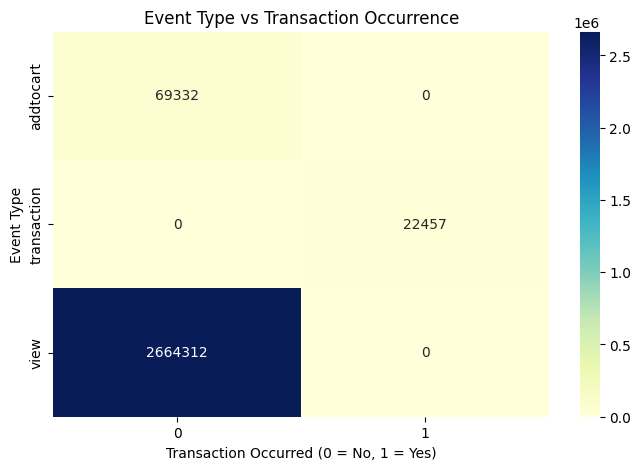

Chi-Square Statistic: 2756101.0
P-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
 [[6.87670756e+04 5.64924407e+02]
 [2.22740180e+04 1.82981991e+02]
 [2.64260291e+06 2.17090936e+04]]
Reject the null hypothesis: There is a significant relationship between event type and transaction occurrence.


In [7]:
# Create a new column indicating whether a transaction occurred
df['transaction_occurred'] = df['transactionid'].notna().astype(int)

# Create a contingency table
contingency_table = pd.crosstab(df['event'], df['transaction_occurred'])
print(contingency_table)
# Visualizing contingency table
plt.figure(figsize=(8, 5))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Transaction Occurred (0 = No, 1 = Yes)")
plt.ylabel("Event Type")
plt.title("Event Type vs Transaction Occurrence")
plt.show()

from scipy.stats import chi2_contingency

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# Check significance level
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between event type and transaction occurrence.")
else:
    print("Fail to reject the null hypothesis: No significant relationship found.")


### Conclusion
Based on the chi-square test results, the p-value is below 0.05, we reject the null hypothesis, indicating a meaningful correlation between event type and transaction occurrences.


## An extended EDA with Data Wrangling

Summary statistics for numerical columns:
          timestamp     visitorid        itemid  transactionid  \
count  2.756101e+06  2.756101e+06  2.756101e+06   22457.000000   
mean   1.436424e+12  7.019229e+05  2.349225e+05    8826.497796   
min    1.430622e+12  0.000000e+00  3.000000e+00       0.000000   
25%    1.433478e+12  3.505660e+05  1.181200e+05    4411.000000   
50%    1.436453e+12  7.020600e+05  2.360670e+05    8813.000000   
75%    1.439225e+12  1.053437e+06  3.507150e+05   13224.000000   
max    1.442545e+12  1.407579e+06  4.668670e+05   17671.000000   
std    3.366312e+09  4.056875e+05  1.341954e+05    5098.996290   

                            datetime          hour   day_of_week  \
count                        2756101  2.756101e+06  2.756101e+06   
mean   2015-07-09 06:48:08.348103680  1.279443e+01  2.763684e+00   
min       2015-05-03 03:00:04.384000  0.000000e+00  0.000000e+00   
25%       2015-06-05 04:23:14.792000  4.000000e+00  1.000000e+00   
50%    2015-07-09 14:43

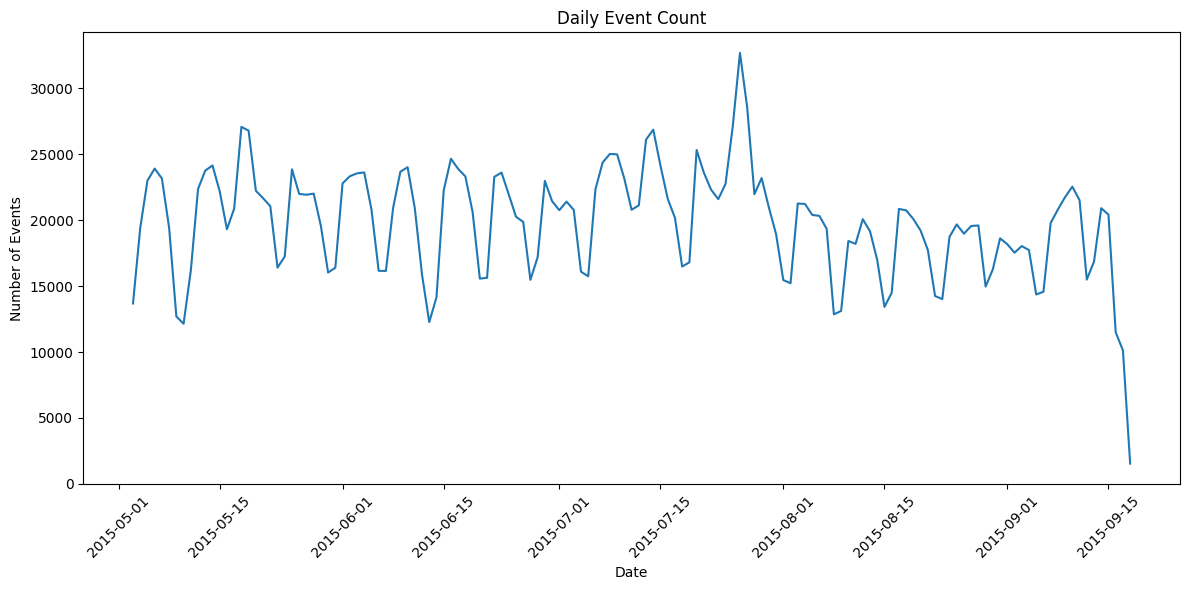

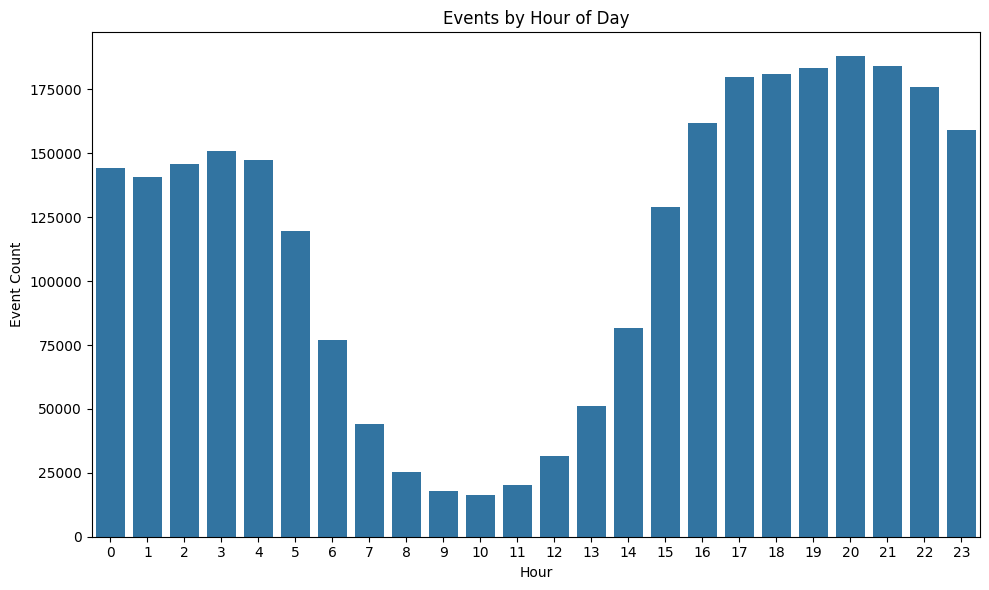

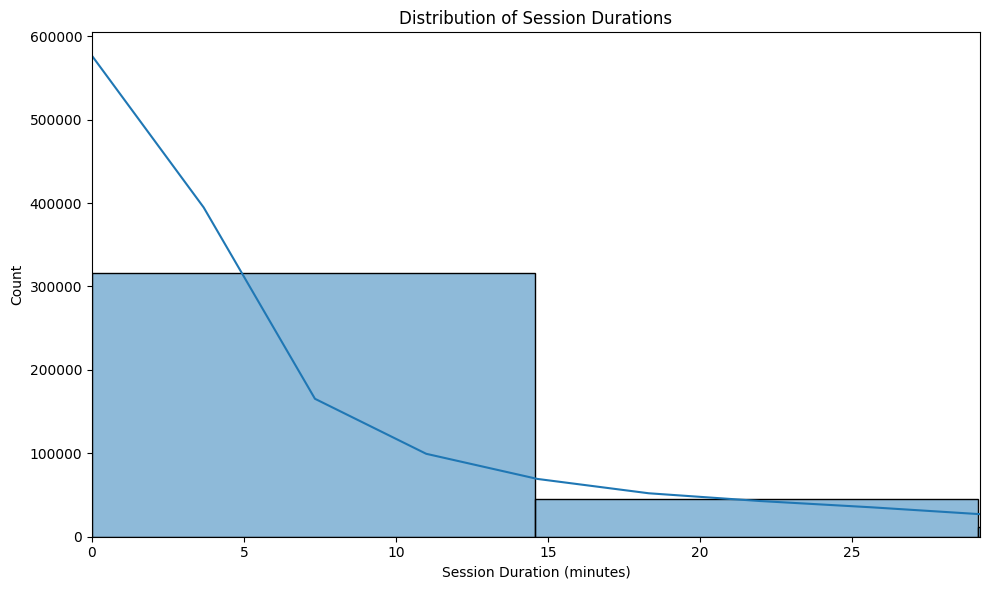

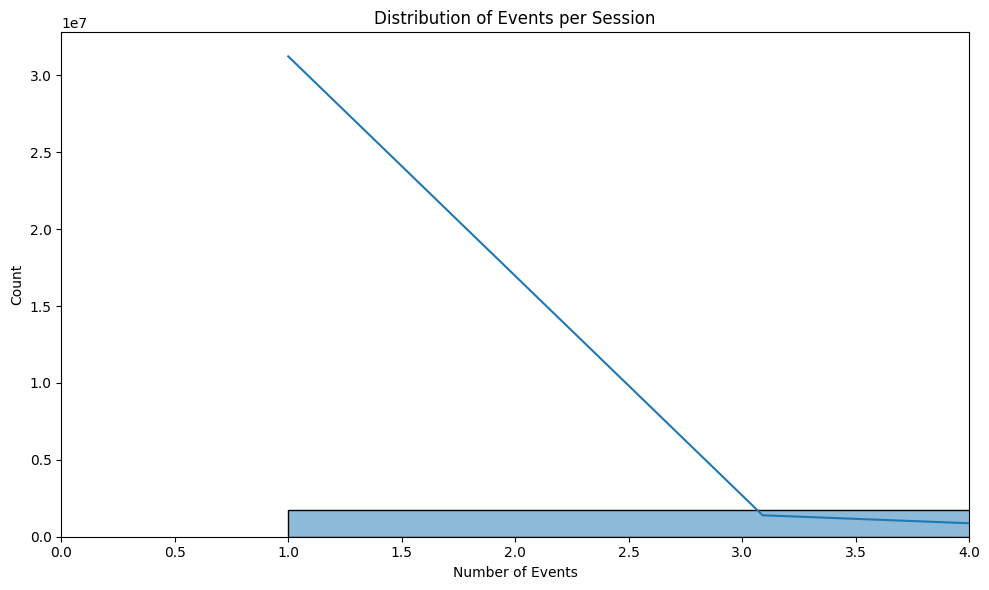

/var/folders/v7/pz5_q5x958gblydndglhwrw00000gp/T/ipykernel_21416/1560146846.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_purchase_rate = session_stats.groupby('duration_bin')['has_purchase'].mean().reset_index()


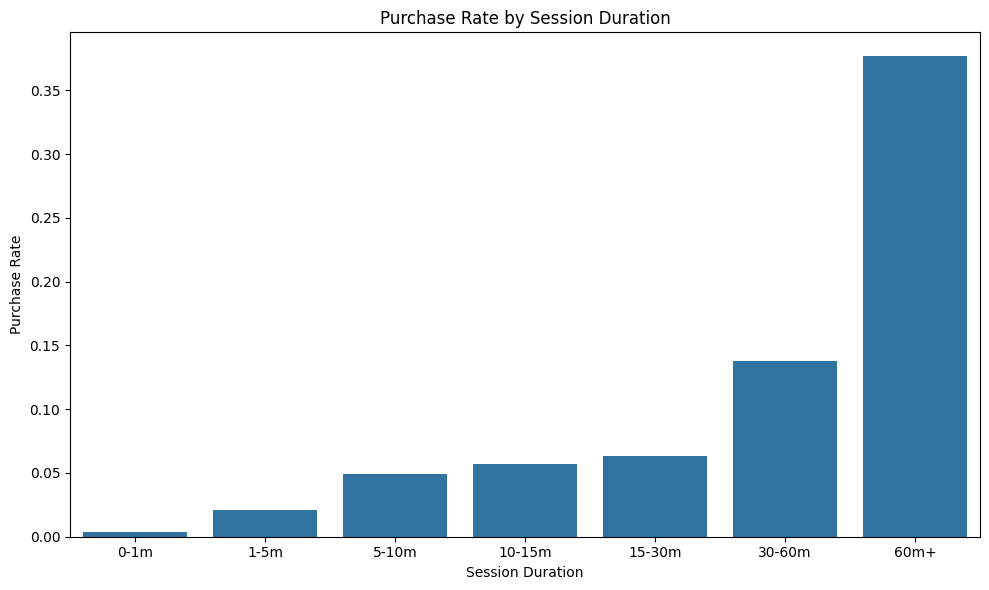

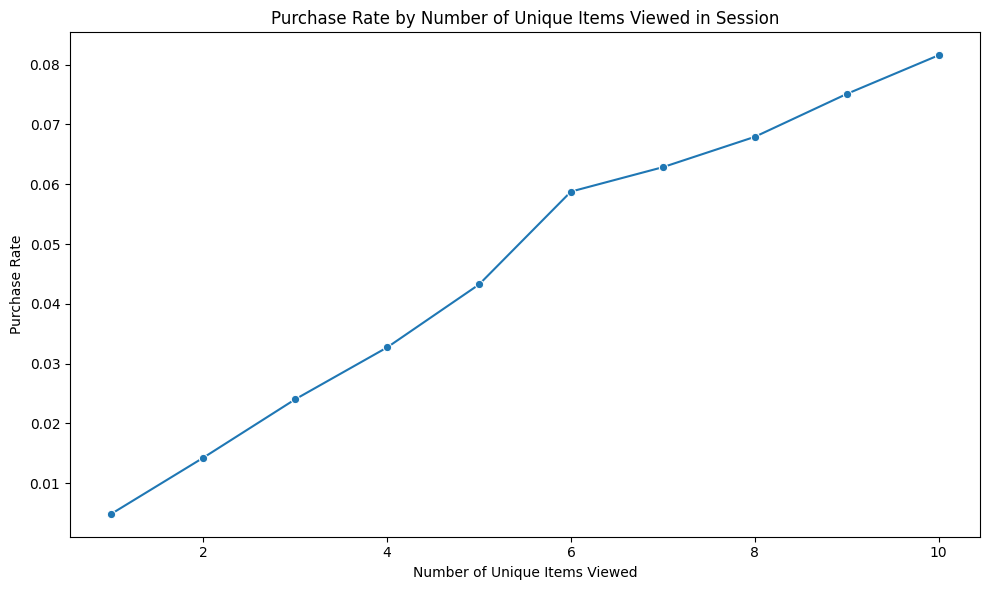

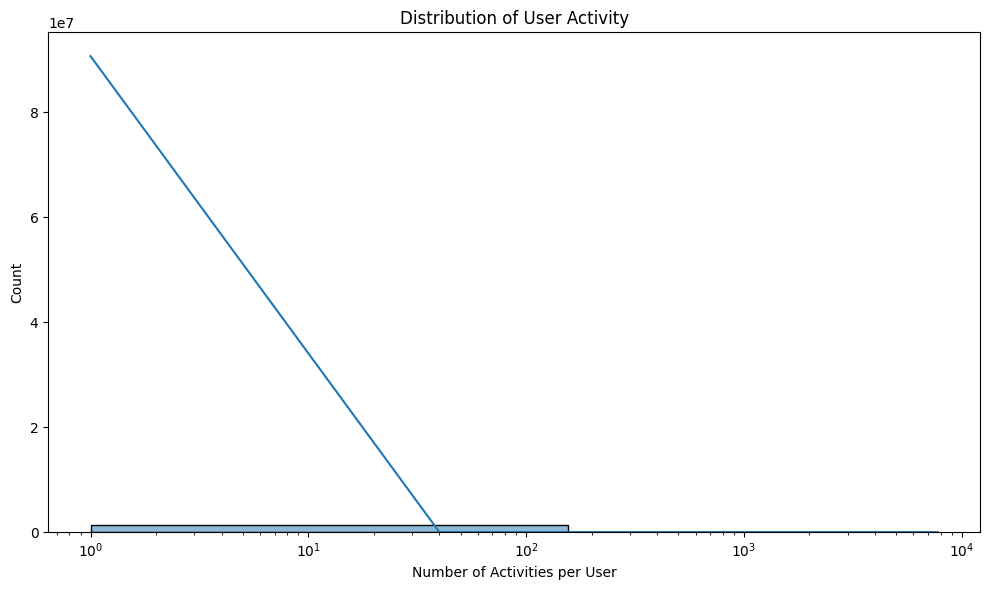

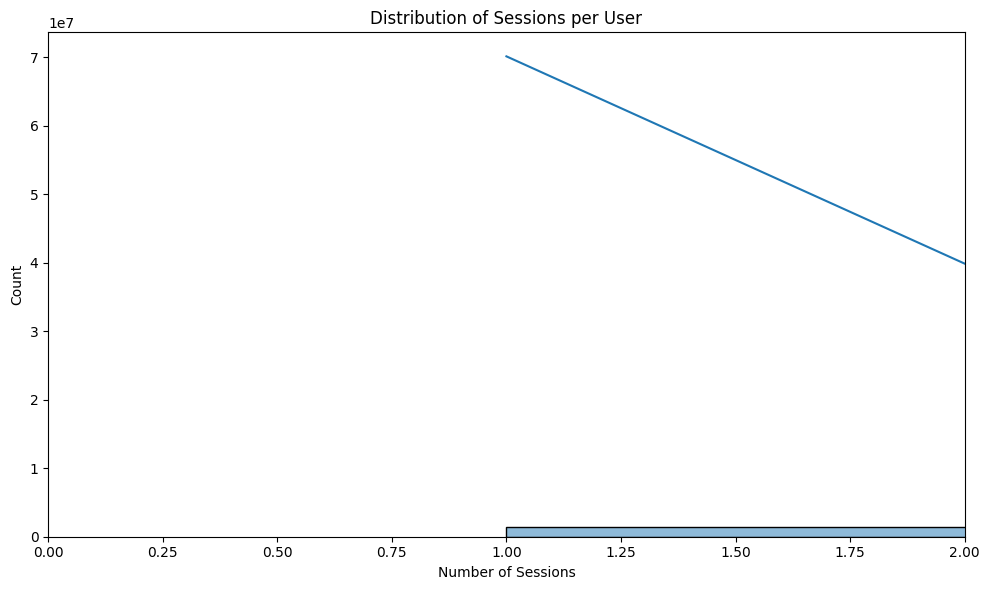


Data analysis complete with session-based feature engineering and visualizations shown.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# 1. Basic data cleaning and preparation
# Convert timestamp to datetime for better readability
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')

# Create a simplified date column for aggregation
df['date'] = df['datetime'].dt.date

# Handle transaction IDs - create indicator for whether a transaction occurred
df['has_transaction'] = df['transactionid'].notna().astype(int)

# 2. FEATURE ENGINEERING: Create user session feature
# Sort data by user and timestamp
df = df.sort_values(['visitorid', 'timestamp'])

# Calculate time difference between consecutive events for each user
df['time_diff'] = df.groupby('visitorid')['timestamp'].diff()

# Define a new session as first activity or gap of more than 30 minutes (1,800,000 ms)
df['new_session'] = ((df['time_diff'].isna()) | (df['time_diff'] > 1800000)).astype(int)

# Create session IDs by cumulative sum of new_session flag
df['session_id'] = df['visitorid'].astype(str) + '_' + df.groupby('visitorid')['new_session'].cumsum().astype(str)

# 3. Basic exploratory analysis
# Summary statistics for numerical columns
numeric_summary = df.describe()
print("Summary statistics for numerical columns:")
print(numeric_summary)

# Event type distribution
event_counts = df['event'].value_counts()
print("\nEvent type distribution:")
print(event_counts)

# Transaction analysis
transaction_rate = df['has_transaction'].mean()
print(f"\nOverall transaction rate: {transaction_rate:.4f}")

# 4. Session analysis (using our new feature)
session_stats = df.groupby('session_id').agg({
    'timestamp': ['count', lambda x: (x.max() - x.min())/1000],  # Events count and session duration in seconds
    'itemid': 'nunique',  # Unique items per session
    'has_transaction': 'sum'  # Transactions per session
}).reset_index()

session_stats.columns = ['session_id', 'event_count', 'duration_seconds', 'unique_items', 'transactions']
session_stats['has_purchase'] = (session_stats['transactions'] > 0).astype(int)

# Session statistics
print("\nSession statistics:")
print(session_stats.describe())

# Count sessions with at least one transaction
sessions_with_transactions = session_stats['has_purchase'].sum()
total_sessions = len(session_stats)
print(f"\nSessions with at least one transaction: {sessions_with_transactions} ({sessions_with_transactions/total_sessions:.2%} of total sessions)")

# 5. Time-based analysis
# Daily activity analysis
daily_activity = df.groupby('date').size().reset_index(name='event_count')

# Hourly patterns
df['hour'] = df['datetime'].dt.hour
hourly_activity = df.groupby('hour')['timestamp'].count().reset_index()
hourly_activity.columns = ['hour', 'count']

# 6. User behavior analysis
# Count events per user
user_activity = df.groupby('visitorid').agg({
    'timestamp': 'count',  # Total activities
    'itemid': 'nunique',   # Unique items viewed
    'has_transaction': 'sum',  # Number of transactions
    'session_id': 'nunique'  # Number of sessions (using our new feature)
}).reset_index()

user_activity.columns = ['visitorid', 'total_activities', 'unique_items_viewed', 'transactions', 'sessions']

# Basic user statistics
user_stats = user_activity.describe()
print("\nUser activity statistics:")
print(user_stats)

# 7. Item analysis
item_analysis = df.groupby('itemid').agg({
    'visitorid': 'nunique',  # Unique visitors
    'timestamp': 'count',    # Total views
    'has_transaction': 'sum',  # Total purchases
    'session_id': 'nunique'  # Number of sessions (using our new feature)
}).reset_index()

item_analysis.columns = ['itemid', 'unique_visitors', 'view_count', 'purchase_count', 'session_count']

# Calculate purchase rate
item_analysis['purchase_rate'] = item_analysis['purchase_count'] / item_analysis['view_count']

# Item statistics
item_stats = item_analysis.describe()
print("\nItem statistics:")
print(item_stats)

# 8. Top items by views and purchases
top_viewed = item_analysis.sort_values('view_count', ascending=False).head(10)
print("\nTop 10 most viewed items:")
print(top_viewed[['itemid', 'view_count', 'unique_visitors', 'session_count']])

top_purchased = item_analysis.sort_values('purchase_count', ascending=False).head(10)
print("\nTop 10 most purchased items:")
print(top_purchased[['itemid', 'purchase_count', 'purchase_rate']])

# 9. Visualizations - directly showing plots instead of saving them

# Plot 1: Time series of daily activity
plt.figure(figsize=(12, 6))
plt.plot(daily_activity['date'], daily_activity['event_count'])
plt.title('Daily Event Count')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Hourly activity pattern
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='count', data=hourly_activity)
plt.title('Events by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Event Count')
plt.tight_layout()
plt.show()

# Plot 3: Distribution of session durations (using our new feature)
# Filter out sessions less than 1 second (likely single event sessions)
valid_sessions = session_stats[session_stats['duration_seconds'] > 1]
plt.figure(figsize=(10, 6))
sns.histplot(valid_sessions['duration_seconds']/60, bins=50, kde=True)
plt.title('Distribution of Session Durations')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Count')
plt.xlim(0, valid_sessions['duration_seconds'].quantile(0.95)/60)  # Limit x-axis to 95th percentile for better visibility
plt.tight_layout()
plt.show()

# Plot 4: Distribution of events per session (using our new feature)
plt.figure(figsize=(10, 6))
sns.histplot(session_stats['event_count'], bins=50, kde=True)
plt.title('Distribution of Events per Session')
plt.xlabel('Number of Events')
plt.ylabel('Count')
plt.xlim(0, session_stats['event_count'].quantile(0.95))  # Limit x-axis to 95th percentile
plt.tight_layout()
plt.show()

# Plot 5: Session duration vs. purchase probability (using our new feature)
# Group sessions by duration (binned) and calculate purchase rate
duration_bins = [0, 60, 300, 600, 900, 1800, 3600, np.inf]  # in seconds
duration_labels = ['0-1m', '1-5m', '5-10m', '10-15m', '15-30m', '30-60m', '60m+']
session_stats['duration_bin'] = pd.cut(session_stats['duration_seconds'], bins=duration_bins, labels=duration_labels)

duration_purchase_rate = session_stats.groupby('duration_bin')['has_purchase'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='duration_bin', y='has_purchase', data=duration_purchase_rate)
plt.title('Purchase Rate by Session Duration')
plt.xlabel('Session Duration')
plt.ylabel('Purchase Rate')
plt.tight_layout()
plt.show()

# Plot 6: Session items vs. purchase probability (using our new feature)
# Group sessions by number of unique items viewed and calculate purchase rate
item_purchase_rate = session_stats.groupby('unique_items')['has_purchase'].mean().reset_index()
# Limit to reasonable range to avoid sparse data
item_purchase_rate = item_purchase_rate[item_purchase_rate['unique_items'] <= 10]

plt.figure(figsize=(10, 6))
sns.lineplot(x='unique_items', y='has_purchase', data=item_purchase_rate, marker='o')
plt.title('Purchase Rate by Number of Unique Items Viewed in Session')
plt.xlabel('Number of Unique Items Viewed')
plt.ylabel('Purchase Rate')
plt.tight_layout()
plt.show()

# Plot 7: Distribution of user activity
plt.figure(figsize=(10, 6))
sns.histplot(user_activity['total_activities'], bins=50, kde=True)
plt.title('Distribution of User Activity')
plt.xlabel('Number of Activities per User')
plt.ylabel('Count')
plt.xscale('log')  # Log scale often works better for skewed distributions
plt.tight_layout()
plt.show()

# Plot 8: Distribution of user sessions (using our new feature)
plt.figure(figsize=(10, 6))
sns.histplot(user_activity['sessions'], bins=30, kde=True)
plt.title('Distribution of Sessions per User')
plt.xlabel('Number of Sessions')
plt.ylabel('Count')
plt.xlim(0, user_activity['sessions'].quantile(0.95))  # Limit x-axis to 95th percentile
plt.tight_layout()
plt.show()

print("\nData analysis complete with session-based feature engineering and visualizations shown.")

### Summary of an extended EDA (Exploratory Data Analysis) 

This code performs **extensive exploratory data analysis (EDA)** on user interaction data for an **e-commerce or web analytics project**, focusing on **session-based user behavior analysis**. The key steps in this EDA include:  

#### **1. Data Cleaning & Preparation**
- Converts **timestamps** to **datetime** format for easier interpretation.
- Creates a **date column** for daily aggregation.
- Adds a **transaction indicator** (`has_transaction`) to identify completed purchases.

#### **2. Feature Engineering**
- Defines **user sessions** by segmenting data based on **30-minute inactivity gaps**.
- Assigns **session IDs** to track user behavior during visits.

#### **3. Exploratory Data Analysis**
- Computes **summary statistics** for numerical columns.
- Analyzes the **distribution of event types** (e.g., clicks, views, purchases).
- Calculates the **overall transaction rate**.

#### **4. Session Analysis**
- Examines **session statistics**, including:
  - **Event count per session** (number of interactions in a session).
  - **Session duration** (time from first to last event).
  - **Number of unique items viewed**.
  - **Session transaction rate**.

#### **5. Time-Based Analysis**
- Aggregates and visualizes **daily event counts**.
- Studies **hourly activity patterns**.

#### **6. User Behavior Analysis**
- Measures user engagement by:
  - **Total number of events per user**.
  - **Unique items viewed per user**.
  - **Transactions per user**.
  - **Number of sessions per user**.

#### **7. Item Analysis**
- Analyzes product popularity:
  - **Unique visitors per item**.
  - **Total views per item**.
  - **Total purchases per item**.
  - **Purchase rate per item**.

- Identifies **top 10 most viewed** and **most purchased items**.

#### **8. Visualizations**
- **Time-series analysis** of daily event counts.
- **Hourly activity distribution**.
- **Session duration distribution**.
- **Event count per session distribution**.
- **Purchase rate vs. session duration**.
- **Purchase rate vs. unique items viewed**.
- **User activity distribution**.
- **Number of sessions per user distribution**.

